In [1]:
import os, sys
sys.path.append('../functions')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from math import *
from Y_views import *
from UV_views import *
%matplotlib inline

In [3]:
all_mctracks = pd.read_csv('Data/MCTrack.csv', delimiter=',')
all_velo_points = pd.read_csv('Data/vetoPoint.csv', delimiter=',')
all_hits = pd.read_csv('Data/strawtubesPoint_decoded_hits.csv', delimiter=',')
all_hits['Index'] = all_hits.index

# Creating Learning Table

In [4]:
%%time

from ReconstructibleTracks import get_reconstractible_tracks

reconstructible_events = {}

for event_id in range(0, 2500):
    
    tracks = get_reconstractible_tracks(event_id, all_hits, all_mctracks, all_velo_points)
    
    if tracks != []:
        reconstructible_events[event_id] = tracks

CPU times: user 8min 26s, sys: 5.59 s, total: 8min 31s
Wall time: 8min 37s


In [5]:
reconstructible_events = np.array(pd.read_csv('./Data/RecognizedTracks.csv'))[:, 1]
reconstructible_events

array([ 513,    2,  515,  516, 1541,  518,    7,   10, 2059, 1036, 1550,
         15, 2392, 1042,  686,   23, 2360,   27, 2077, 1057,  549,   39,
       2271, 1066, 1655, 2482,  558, 2095,   48,   50, 2099,   53, 1204,
       1546,   62, 1775, 1600, 2113, 1090, 2423, 1206, 1606, 1607, 1548,
         74, 1293, 1213,   84,   85,   86, 1111, 2138, 1116, 1629,  606,
       1637,  608,   97, 1979,  612,  102,  614, 1129,  106, 1895, 2305,
       2157,  622,  957, 1136,  625, 1138, 2232, 2164, 1893, 1142, 1385,
       2493,  122, 1668,  126, 1557,  129,  642,  131,  644, 1157,  134,
        135,  648, 1280,  651, 1474,  654,  143, 1683, 2224, 1691, 1180,
        157,  670,  159, 2208,  161, 2246, 1190, 1704,  174, 1200, 1224,
        179,  692, 1717,  694,  184, 1722, 1724,  189, 2239, 1677, 1440,
        707, 2244, 1967, 1222,  712,  715, 1900,  719, 1232, 2446,  211,
       2260, 1238,  215, 2264, 1242, 1243, 1756,  221, 1758,  735,  736,
       1761, 1762, 1251,  806, 1256, 1769, 2282,  7

In [33]:
len(reconstructible_events)

318

In [6]:
match_table = {}
for i in all_hits.Index:
        match_table[all_hits.Index[i]] = all_hits.TrackID[i]

In [7]:
table = pd.DataFrame(columns=('event', 'TrackID', 'bef/aft', 'N', 'Max_1', 'Min_1', 'deviation_1', 
                              'Max_0', 'Min_0', 'deviation_0', 'Class'))
marks = {}

In [8]:
def dist2Track(point, track):
    return np.abs(- track[0] * point[0] + point[1] - track[1]) / np.sqrt(track[0]**2 + 1.0)

In [9]:
%%time
index = 1

for i in reconstructible_events:
    
    event = modify_for_yz_analysis_1_2(all_hits[all_hits['event'] == i])
    
    tracks_yz_1_2, linking_table_yz_1_2 = loop_yz(event, 7, 0.85, 0, 0)
    
    for k in tracks_yz_1_2:
        
        N = len(linking_table_yz_1_2[k])
        dists_1 = [dist2Track((event.Wz[j], event.Wy[j]), tracks_yz_1_2[k]) / event.dist2Wire[j] for j in linking_table_yz_1_2[k]]
        arr = [match_table[j] for j in linking_table_yz_1_2[k]]
        Max_1 = np.max(dists_1)
        Min_1 = np.min(dists_1)
        deviation_1 = np.average(dists_1)
        dists_0 = [np.abs(dist2Track((event.Wz[j], event.Wy[j]), tracks_yz_1_2[k]) - event.dist2Wire[j])/event.dist2Wire[j] for j in linking_table_yz_1_2[k]]
        Max_0 = np.max(dists_0)
        Min_0 = np.min(dists_0)
        deviation_0 = np.average(dists_0)
        _, counts = np.unique(arr, return_counts = True)
        cl = 1. * np.max(counts) / len(linking_table_yz_1_2[k])
        table.loc[index] = [i, k, 0, N, Max_1, Min_1, deviation_1, Max_0, Min_0, deviation_0, cl]
        index += 1
        
        
        
    event = modify_for_yz_analysis_3_4(all_hits[all_hits['event'] == i])
    
    tracks_yz_3_4, linking_table_yz_3_4 = loop_yz(event, 7, 0.85, 1, 0)
    
    for k in tracks_yz_3_4:
        
        N = len(linking_table_yz_3_4[k])
        dists_1 = [dist2Track((event.Wz[j], event.Wy[j]), tracks_yz_3_4[k]) / event.dist2Wire[j] for j in linking_table_yz_3_4[k]]
        arr = [match_table[j] for j in linking_table_yz_3_4[k]]
        Max_1 = np.max(dists_1)
        Min_1 = np.min(dists_1)
        deviation_1 = np.average(dists_1)
        dists_0 = [np.abs(dist2Track((event.Wz[j], event.Wy[j]), tracks_yz_3_4[k]) - event.dist2Wire[j]) for j in linking_table_yz_3_4[k]]
        Max_0 = np.max(dists_0)
        Min_0 = np.min(dists_0)
        deviation_0 = np.average(dists_0)
        _, counts = np.unique(arr, return_counts = True)
        cl = 1. * np.max(counts) / len(linking_table_yz_3_4[k])
        table.loc[index] = [i, k, 1, N, Max_1, Min_1, deviation_1, Max_0, Min_0, deviation_0, cl]
        index += 1

CPU times: user 25min 15s, sys: 14.4 s, total: 25min 29s
Wall time: 25min 52s


In [10]:
table.head()

,event,TrackID,bef/aft,N,Max_1,Min_1,deviation_1,Max_0,Min_0,deviation_0,Class
1,513,1,0,8,1.215309,0.7590737,1.007472,0.2409263,0.02786628,0.1204302,1
2,513,2,0,8,1.039541,0.9654922,1.000407,0.03954147,0.009435276,0.02354968,1
3,513,1,1,9,1.206719,0.02686287,0.9078156,0.03451443,0.001504598,0.01483716,1
4,513,2,1,8,1.143564,0.22793,0.833862,0.0461682,0.003185929,0.02502653,1
5,2,1,0,9,1.034219,0.2796395,0.8986691,0.7203605,0.00472628,0.1151118,1


In [11]:
table.to_csv('./Data/TracksTable.csv')

# Show efficiency of classifier

In [12]:
table = pd.read_csv('./Data/TracksTable.csv')

In [11]:
table.head()

,event,TrackID,bef/aft,N,Max_1,Min_1,deviation_1,Max_0,Min_0,deviation_0,Class
1,513,1,0,8,1.215309,0.7590737,1.007472,0.2409263,0.02786628,0.1204302,1
2,513,2,0,8,1.039541,0.9654922,1.000407,0.03954147,0.009435276,0.02354968,1
3,513,1,1,9,1.206719,0.02686287,0.9078156,0.03451443,0.001504598,0.01483716,1
4,513,2,1,8,1.143564,0.22793,0.833862,0.0461682,0.003185929,0.02502653,1
5,2,1,0,9,1.034219,0.2796395,0.8986691,0.7203605,0.00472628,0.1151118,1


In [20]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn import cross_validation
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import metrics

In [21]:
X = table[['Max_1', 'Min_1', 'deviation_1', 'Max_0', 'Min_0', 'deviation_0']].values
y = table['Class'].values

X = StandardScaler().fit_transform(X)

/Users/mikhail91/.virtualenvs/rep_0_6_2/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/mikhail91/.virtualenvs/rep_0_6_2/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [22]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.4)

In [23]:
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, (y==1)*1, test_size = 0.4)

clf = RandomForestClassifier(n_estimators=100, 
                             max_features='auto', 
                             max_depth=None, 
                             bootstrap=True, 
                             class_weight='balanced')
#clf = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1000, max_depth=6)
#clf = SVC()

In [28]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Decision Scores

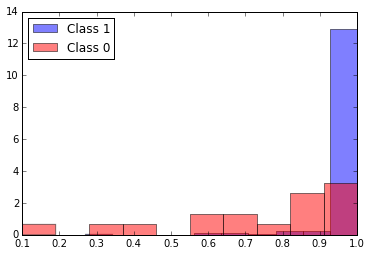

In [29]:
plt.hist(clf.predict_proba(X_test[y_test==1]).T[1], color="blue", label="Class 1", normed=True, alpha=0.5)
plt.hist(clf.predict_proba(X_test[y_test!=1]).T[1], color="red", label="Class 0", normed=True, alpha=0.5)
plt.legend(loc="upper left")

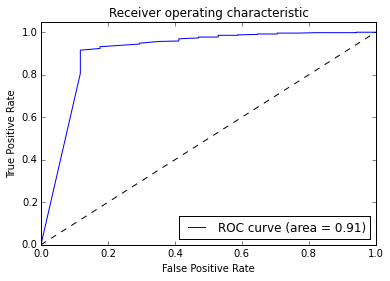

In [30]:
y_score = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

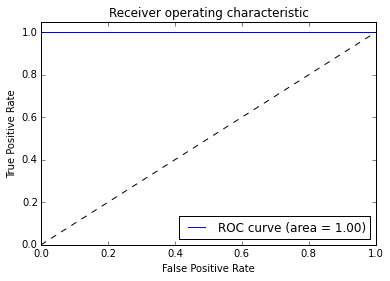

In [31]:
y_score = clf.predict(X_train)
fpr, tpr, thresholds = metrics.roc_curve((y_train==1)*1, y_score, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

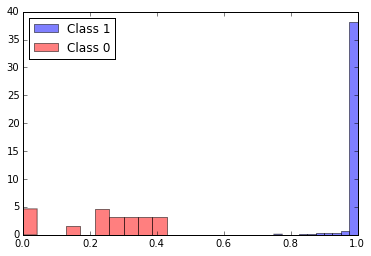

In [32]:
plt.hist(clf.predict_proba(X_train[y_train==1]).T[1], color="blue", label="Class 1", normed=True, alpha=0.5)
plt.hist(clf.predict_proba(X_train[y_train!=1]).T[1], color="red", label="Class 0", normed=True, alpha=0.5)
plt.legend(loc="upper left")

# 2D plots of paired features

# Histograms of the features

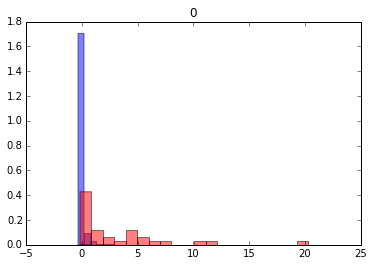

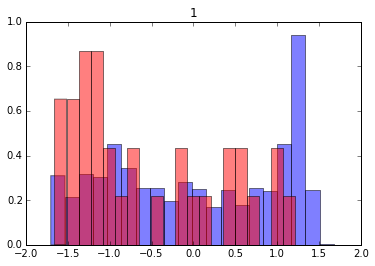

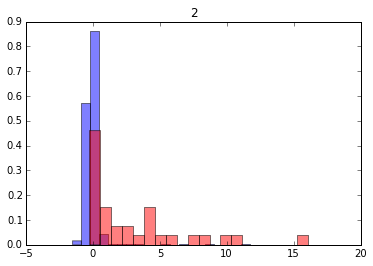

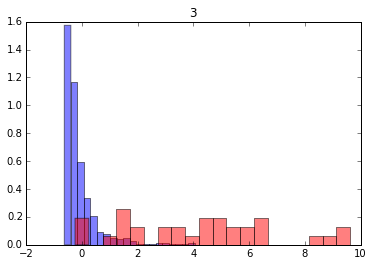

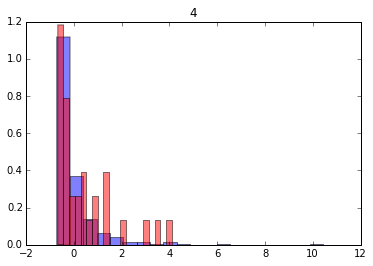

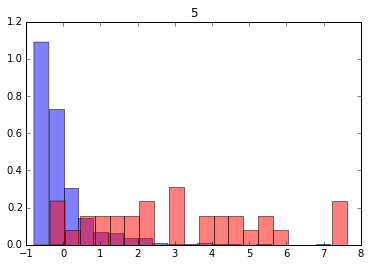

IndexError: index 6 is out of bounds for axis 1 with size 6

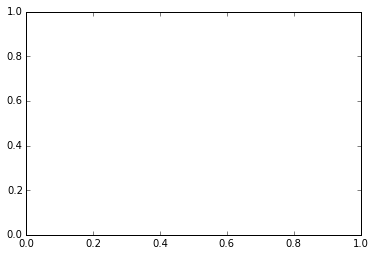

In [460]:

for i in range(0, len(X)):
    plt.subplot(1,1,1)
    plt.hist(X[y==1, i], color='blue', bins=20, normed=True, alpha=0.5)
    plt.hist(X[y!=1, i], color='red', bins=20, normed=True, alpha=0.5)
    plt.title(i)
    plt.show()
print "Class 0- red"
print "Class 1- blue"

# Metrics

In [27]:
#all metrics were calculated with option pos_label = 0 (classes are swapped)

# ROC

In [58]:
from sklearn import metrics

In [48]:
y_score = clf.predict_proba(X_test)

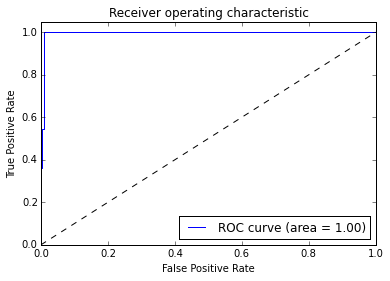

In [49]:
y_score = clf.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score[:,0], pos_label=0)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

# Recall

In [31]:
metrics.recall_score(y_test, clf.predict(X_test), pos_label=0)

0.59999999999999998

# Precision

In [32]:
metrics.precision_score(y_test, clf.predict(X_test), pos_label=0)

0.70588235294117652

# Examples of events with low efficiency

In [34]:
def picture(event, ind):
    plane_width = 0.85
    n_min = 7
    tracks, linking_table = loop_yz(event, n_min, plane_width, ind)
    crossing_points = linking_table
    
    event = modify_for_yz_analysis_1_2(event)
    
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(1, 1, 1)
    
    original_tracks = set(event.TrackID)
    if -2 in original_tracks:
        original_tracks.remove(-2)

    for j in original_tracks:
        track = event[event.TrackID==j]
        Wz = track.Wz.values
        Wy = track.Wy.values
        Z = track.Z.values
        Y = track.Y.values
        R = track.dist2Wire.values
        StrwR = 0.5 * np.ones(shape=(Z.shape[0],))

        # originl track and hits
        plt.plot(Z, Y, c='r', label='original track '+str(j))
        plt.scatter(Z, Y, c='r', label='original hits')

        # The wire centers and dist2wire
        plt.scatter(Wz, Wy, c='b', label='wire centers')
        for index in range(0, Z.shape[0]):
            circ = plt.Circle((Wz[index], Wy[index]), radius=R[index], color='b', fill=False)
            ax.add_patch(circ)

    for j in tracks:
        # crossing point
        Z_crossing = np.array([event.loc[i].Wz for i in crossing_points[j]])
        Y_crossing = np.array([event.loc[i].Wy for i in crossing_points[j]])
        Y_line_crossing = Z_crossing * tracks[j][0] + tracks[j][1]

        plt.scatter(Z_crossing, Y_crossing, c='gold', label='crossing points', s=50)
        plt.plot(Z_crossing, Y_line_crossing , c='gold', label='crossing track '+str(j))



    plt.legend(loc='best')
    plt.show()

In [35]:
table[table.Class==0]

,Unnamed: 0,event,TrackID,bef/aft,N,Max_1,Min_1,deviation_1,Max_0,Min_0,deviation_0,Class
26,27,7,1,1,12,35.033507,0.156232,6.193331,0.825922,0.018798,0.262159,0
35,36,1036,1,0,10,3.229657,0.194631,1.407867,0.505826,0.000605,0.083997,0
67,68,27,1,0,10,5.389423,0.015593,1.714079,0.422015,0.014423,0.150648,0
68,69,27,2,0,7,2.834492,0.842329,1.322691,0.169539,0.000430,0.042291,0
103,104,558,2,0,9,3.653798,0.418477,1.320158,0.392590,0.009111,0.100279,0
150,151,1090,1,0,10,8.071062,0.183980,2.413192,0.576396,0.002753,0.192606,0
418,419,1704,1,1,9,9.412105,0.519238,2.426612,0.459014,0.019350,0.160836,0
450,451,184,1,1,10,1.652939,0.782516,1.116232,0.288709,0.002835,0.055462,0
452,453,1722,1,0,10,9.362538,0.473632,2.383530,0.518676,0.007626,0.118592,0
465,466,2239,1,1,9,10.272360,0.696425,2.800949,0.561250,0.015732,0.166443,0


In [36]:
event_id = 27
event = all_hits[all_hits['event'] == event_id]
event = modify_for_yz_analysis_1_2(event)
event

,Unnamed: 0,Unnamed: 0.1,Bits,TrackID,Px,Py,Pz,Time,Length,ELoss,...,event,k,StatNb,ViewNb,PlaneNb,LayerNb,StrawNb,Index,Wy,Wz
3420,3420,3420,33554432,2,0.506768,0.068706,32.412354,383.907318,0.510836,2.823857e-06,...,27,35,1,0,0,0,311,3420,-46.6514,2581.15
3385,3385,3385,33554432,3,-0.364015,-0.348315,35.865162,383.940033,0.751938,2.586669e-06,...,27,0,1,0,0,1,312,3385,-47.5314,2582.25
3421,3421,3421,33554432,2,0.507201,0.068788,32.412304,383.947815,0.278159,1.793916e-06,...,27,36,1,0,0,1,312,3421,-47.5314,2582.25
3386,3386,3386,33554432,3,-0.363989,-0.348006,35.865147,383.986938,0.931124,3.301072e-06,...,27,1,1,0,1,0,311,3386,-47.0914,2583.75
3422,3422,3422,33554432,2,0.507475,0.068531,32.412266,383.986298,0.973040,3.470375e-06,...,27,37,1,0,1,0,311,3422,-47.0914,2583.75
3427,3427,3427,33554432,2,0.507166,0.066513,32.412174,384.905426,0.672471,2.501201e-06,...,27,42,1,3,0,0,311,3427,-46.6514,2611.15
3391,3391,3391,33554432,3,-0.364227,-0.345896,35.865002,384.937042,0.974006,2.919081e-06,...,27,6,1,3,0,1,312,3391,-47.5314,2612.25
3392,3392,3392,33554432,3,-0.363710,-0.345494,35.864986,384.995789,0.443074,2.077574e-07,...,27,7,1,3,1,0,311,3392,-47.0914,2613.75
3428,3428,3428,33554432,2,0.507091,0.066439,32.412159,384.987396,0.957235,4.124390e-06,...,27,43,1,3,1,0,311,3428,-47.0914,2613.75
3393,3393,3393,33554432,3,-0.363652,-0.345597,35.864952,385.032837,0.438834,6.918509e-07,...,27,8,1,3,1,1,312,3393,-47.9714,2614.85


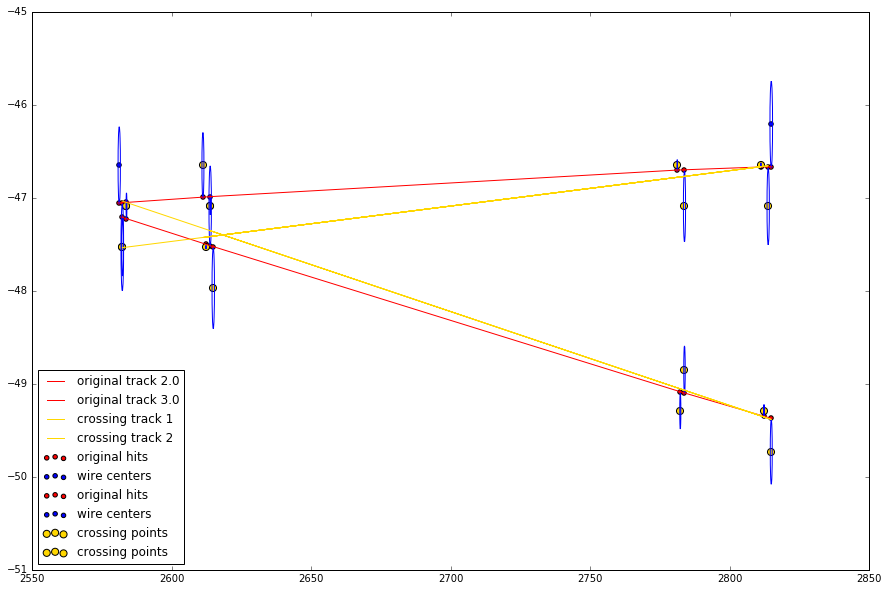

In [37]:
picture(event, 0)

In [38]:
event_id = 1533
event = all_hits[all_hits['event'] == event_id]
event = modify_for_yz_analysis_1_2(event)
event

,Unnamed: 0,Unnamed: 0.1,Bits,TrackID,Px,Py,Pz,Time,Length,ELoss,...,event,k,StatNb,ViewNb,PlaneNb,LayerNb,StrawNb,Index,Wy,Wz
63725,63725,63725,33554432,2,0.717190,0.279212,31.428078,383.913452,0.959449,1.357837e-06,...,1533,36,1,0,0,0,284,63725,0.8686,2581.15
63689,63689,63689,33554432,3,0.005185,-0.276827,39.177643,383.949371,0.971955,8.430991e-06,...,1533,0,1,0,0,1,285,63689,-0.0114,2582.25
63690,63690,63690,33554432,3,0.005403,-0.276315,39.177380,384.042419,0.599313,3.280410e-06,...,1533,1,1,0,1,1,285,63690,-0.4514,2584.85
63726,63726,63726,33554432,2,0.717201,0.279313,31.428057,384.040771,0.735214,2.884626e-06,...,1533,37,1,0,1,1,284,63726,1.3086,2584.85
63731,63731,63731,33554432,2,0.716971,0.281243,31.427633,384.919220,0.669052,3.607152e-06,...,1533,42,1,3,0,0,284,63731,0.8686,2611.15
63695,63695,63695,33554432,3,0.005999,-0.278033,39.177261,384.952271,0.837260,3.658851e-06,...,1533,6,1,3,0,1,285,63695,-0.0114,2612.25
63696,63696,63696,33554432,3,0.006247,-0.278581,39.177242,385.037872,0.912169,3.210794e-06,...,1533,7,1,3,1,1,285,63696,-0.4514,2614.85
63732,63732,63732,33554432,2,0.716910,0.281342,31.427616,385.037781,0.969435,4.085958e-06,...,1533,43,1,3,1,1,284,63732,1.3086,2614.85
63733,63733,63733,33554432,2,0.716771,0.307057,31.427362,390.587616,0.909499,1.183310e-05,...,1533,44,2,0,0,0,283,63733,2.6286,2781.15
63766,63766,63766,33554432,-2,0.000215,-0.002383,-0.003691,391.846985,0.939809,2.279419e-06,...,1533,77,2,0,0,0,300,63766,-27.2914,2781.15


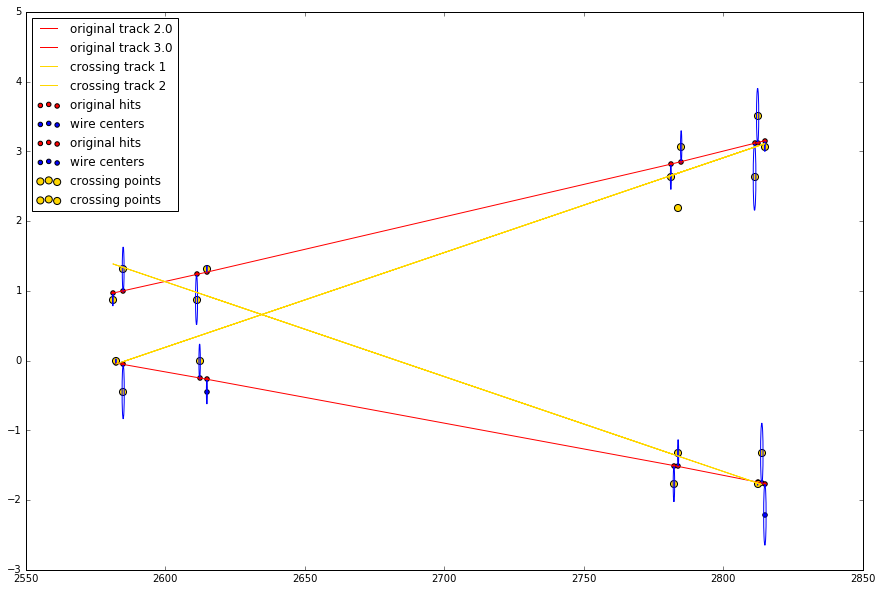

In [39]:
picture(event, 0)

In [40]:
event_id = 970
event = all_hits[all_hits['event'] == event_id]
event = modify_for_yz_analysis_1_2(event)
event

,Unnamed: 0,Unnamed: 0.1,Bits,TrackID,Px,Py,Pz,Time,Length,ELoss,...,event,k,StatNb,ViewNb,PlaneNb,LayerNb,StrawNb,Index,Wy,Wz
37376,37376,37376,33554432,3,0.692779,0.007972,17.495743,384.005981,0.656757,0.000003,...,970,0,1,0,0,0,275,37376,16.7086,2581.15
37413,37413,37413,33554432,2,-0.127237,0.066364,27.165863,384.009247,0.803295,0.000002,...,970,37,1,0,0,1,273,37413,21.1086,2582.25
37377,37377,37377,33554432,3,0.692812,0.008069,17.495712,384.087677,0.962054,0.000004,...,970,1,1,0,1,0,275,37377,16.2686,2583.75
37414,37414,37414,33554432,2,-0.126968,0.066352,27.165850,384.094116,0.913442,0.000004,...,970,38,1,0,1,1,273,37414,20.6686,2584.85
37382,37382,37382,33554432,3,0.693612,0.010224,17.495575,385.006897,0.690213,0.000006,...,970,6,1,3,0,0,275,37382,16.7086,2611.15
37420,37420,37420,33554432,2,-0.126926,0.063873,27.165684,385.008606,0.885181,0.000003,...,970,44,1,3,0,1,273,37420,21.1086,2612.25
37383,37383,37383,33554432,3,0.693973,0.010354,17.495522,385.089264,0.956000,0.000008,...,970,7,1,3,1,0,275,37383,16.2686,2613.75
37421,37421,37421,33554432,2,-0.126620,0.063608,27.165670,385.095947,0.846273,0.000008,...,970,45,1,3,1,1,273,37421,20.6686,2614.85
37384,37384,37384,33554432,3,0.694204,0.035973,17.495455,390.677979,0.936313,0.000002,...,970,8,2,0,0,0,275,37384,16.7086,2781.15
37422,37422,37422,33554432,2,-0.126774,0.037551,27.165695,390.678375,0.942576,0.000003,...,970,46,2,0,0,1,273,37422,21.1086,2782.25


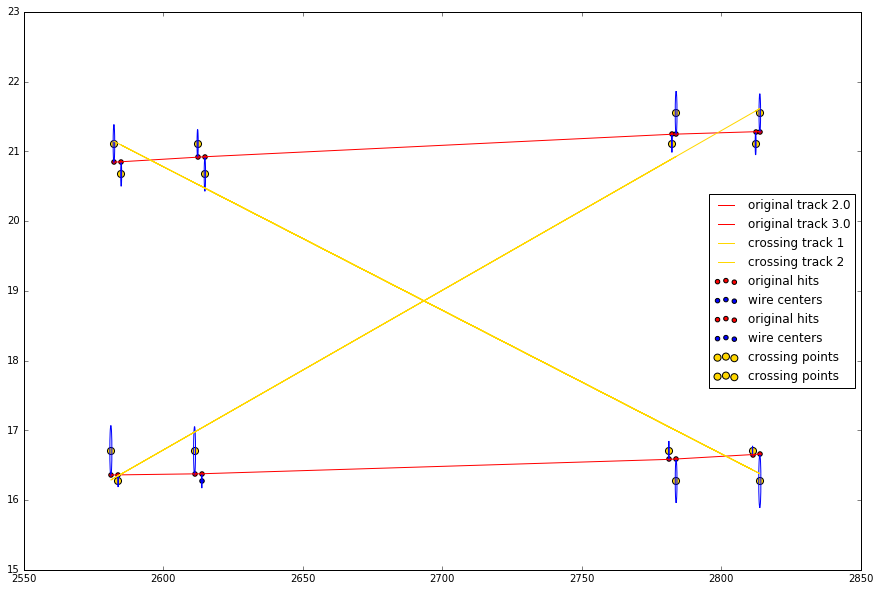

In [41]:
picture(event, 0)